# Support Vector Machines.

## SVC stands for Support Vector Machine classifier, which is a type of supervised machine learning algorithm used for classification and regression analysis. SVC works by finding the best decision boundary that separates the classes in the input data.

### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### reading the data and checking for null values

In [2]:
df=pd.read_csv('../data/mouse_viral_study.csv',na_values=['NA','?'])

In [3]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.isna().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

### function to remove outliers

In [19]:
def remove_outliers(df,name,sd):
    drop_rows=df.index[(np.abs(df[name]-df[name].mean())>=(sd*df[name].std()))]
    df.drop(drop_rows,axis=0,inplace=True)

### train test split

In [7]:
x=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

### scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### creating the model and fitting the training data

In [13]:
from sklearn.svm import SVC

In [14]:
svc=SVC(kernel='rbf',gamma='auto',C=1)

In [15]:
svc.fit(X_train,y_train)

SVC(C=1, gamma='auto')

### predictions based on test data

In [16]:
pred=svc.predict(X_test)

### evaluating the model

In [17]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [18]:
def met(p):
    a=print(classification_report(y_test,p))
    b=ConfusionMatrixDisplay.from_predictions(y_test,p)
    return a,b

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



(None,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x14b0a1a00>)

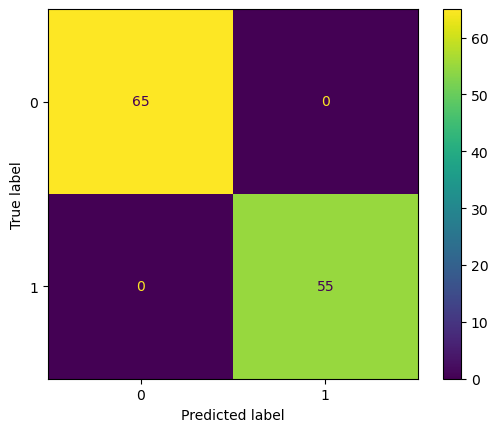

In [20]:
met(pred)

### exploring different types of kernels

### In SVC, a kernel function is used to transform the input data into a higher-dimensional space where the decision boundary can be more easily found. There are several types of kernel functions that can be used with SVC

In [21]:
from svm_margin_plot import plot_svm_boundary

### rbf kernel

### Radial Basis Function (RBF) kernel: This kernel function is used when the data is not linearly separable and the polynomial kernel is not effective. It transforms the input data into a higher-dimensional space where the decision boundary is a non-linear function.

In [23]:
model=SVC(kernel='rbf',C=1)

In [24]:
model.fit(x,y)

SVC(C=1)

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


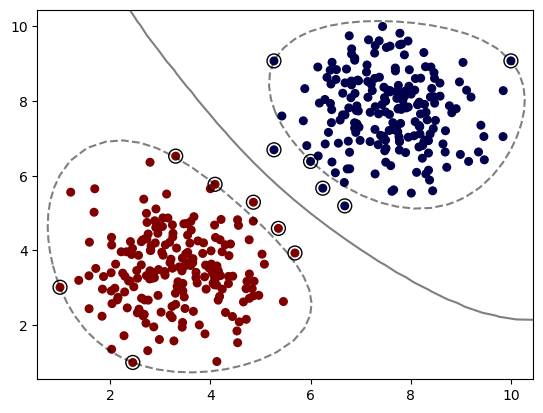

In [25]:
plot_svm_boundary(model,x,y)

### linear kernel

### Linear kernel: This is the simplest kernel function and is used when the data is linearly separable. It transforms the input data into a higher-dimensional space where the decision boundary is a hyperplane.

In [28]:
model1=SVC(kernel='linear',C=1)

In [29]:
model1.fit(x,y)

SVC(C=1, kernel='linear')

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


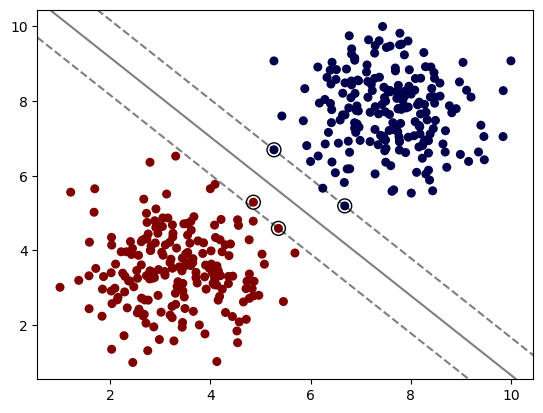

In [30]:
plot_svm_boundary(model1,x,y)

### sigmoid kernel

### Sigmoid kernel: This kernel function is used when the data is not linearly separable and the RBF kernel is not effective. It transforms the input data into a higher-dimensional space where the decision boundary is a sigmoid function.

In [31]:
model2=SVC(kernel='sigmoid',C=1)

In [32]:
model2.fit(x,y)

SVC(C=1, kernel='sigmoid')

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


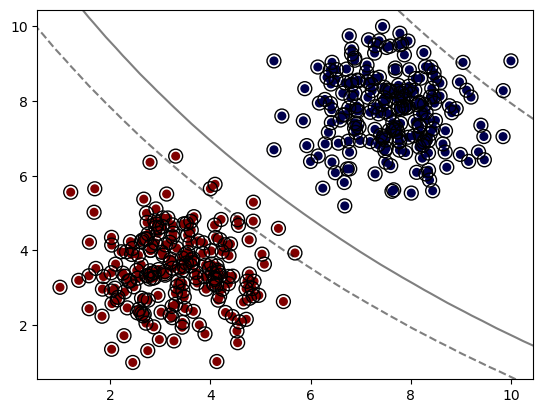

In [33]:
plot_svm_boundary(model2,x,y)

### polynomial kernel

### Polynomial kernel: This kernel function is used when the data is not linearly separable. It transforms the input data into a higher-dimensional space where the decision boundary is a polynomial function.

In [40]:
model3=SVC(kernel='poly',C=1,degree=4)

In [41]:
model3.fit(x,y)

SVC(C=1, degree=4, kernel='poly')

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


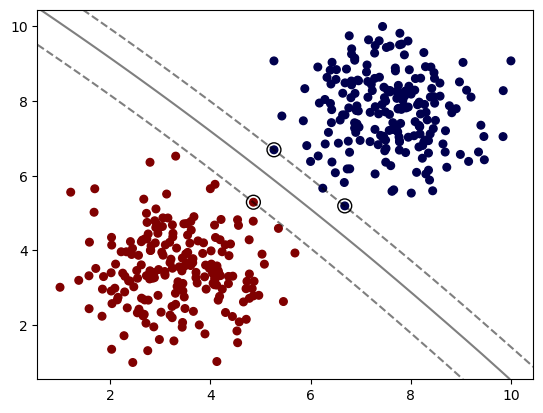

In [42]:
plot_svm_boundary(model3,x,y)

### The choice of kernel function depends on the characteristics of the input data and the problem being solved. In general, the RBF kernel is the most commonly used kernel function in SVC because it can handle non-linearly separable data and has a high accuracy rate.